<a href="https://colab.research.google.com/github/tien02/CS114.M11/blob/main/B%C3%A0i%20t%E1%BA%ADp%20th%E1%BB%B1c%20h%C3%A0nh%20s%E1%BB%91%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>BÁO CÁO BÀI TẬP THỰC HÀNH SỐ 1</b></center></h1>

<h2><center><b>Bài toán dự đoán thời gian chạy của thuật toán (Run time prediction)</b></center></h2><br>

<table style="border:1px;">
  <tr style="border:1px;">
    <th>STT</th>
    <th>Họ và Tên</th>
    <th>MSSV</th>
  </tr>
  <tr style="border:1px;">
    <td>1</td>
    <td>Đặng Anh Tiến</td>
    <td>20520800</td>
  </tr>
  <tr style="border:1px;">
    <td>2</td>
    <td>Đào Minh Tuấn</td>
    <td>20520842</td>
  </tr>
  <tr style="border:1px;">
    <td>3</td>
    <td>Nguyễn Thị Hiền Trang</td>
    <td>19522383</td>
  </tr>
</table>

# **Mount Drive**

In [1]:
# Kết nối với Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#  **Libraries & Functions**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
def Evaluation_Metrics(y, y_pred, text):
  print("==========Evaluate on {} Set==========".format(text))
  print("Mean Absolute Error: {}" .format(mean_absolute_error(y, y_pred)))
  print("Mean Squared Error: {}" .format(mean_squared_error(y, y_pred)))
  print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y,y_pred))))
  print("R2-score: {}".format(r2_score(y , y_pred) ))
  print('----------------------------------------------\n')

# **Data**

In [4]:
# Đọc dữ liệu
data2 = pd.read_csv('/content/drive/MyDrive/CS114/Dự đoán Thời Gian Chạy/Dự đoán thời gian chạy Dataset/train.txt', names = ['Data Size', 'Runtime'])
data3 = pd.read_csv('/content/drive/MyDrive/CS114/Dự đoán Thời Gian Chạy/Dự đoán thời gian chạy Dataset/test.txt', names = ['Data Size', 'Runtime'])
data4 = pd.read_csv('/content/drive/MyDrive/CS114/Dự đoán Thời Gian Chạy/Dự đoán thời gian chạy Dataset/data4.txt', names = ['Data Size', 'Runtime'])

In [5]:
print("Shape of Data 2 Set: {}".format(data2.shape))
print("Shape of Data 3 Set: {}".format(data3.shape))
print("Shape of Data 4 Set: {}".format(data4.shape))

Shape of Data 2 Set: (71115, 2)
Shape of Data 3 Set: (10590, 2)
Shape of Data 4 Set: (6023, 2)


In [6]:
data2.head(5)

,Data Size,Runtime
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


In [7]:
data3.head(5)

,Data Size,Runtime
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831


In [8]:
data4.head(5)

,Data Size,Runtime
0,50142057,5.51836
1,65232531,7.18304
2,67683741,6.94395
3,59798449,5.48383
4,62297119,5.65503


In [9]:
data2.describe()

,Data Size,Runtime
count,7.111500e+04,71115.000000
mean,4.998766e+06,0.406785
std,2.882618e+06,0.244039
min,2.550000e+02,0.000009
25%,2.496521e+06,0.192746
50%,5.010144e+06,0.403410
75%,7.481742e+06,0.616155
max,9.999882e+06,0.983776


In [10]:
data3.describe()

,Data Size,Runtime
count,1.059000e+04,10590.000000
mean,2.999277e+07,2.642812
std,5.759381e+06,0.537305
min,2.000026e+07,1.669640
25%,2.503806e+07,2.180550
50%,2.994436e+07,2.639820
75%,3.500845e+07,3.100155
max,3.999734e+07,4.287660


In [11]:
data4.describe()

,Data Size,Runtime
count,6.023000e+03,6023.000000
mean,6.001134e+07,5.510494
std,5.788140e+06,0.571520
min,5.000951e+07,4.395220
25%,5.501938e+07,5.019585
50%,5.992788e+07,5.495210
75%,6.506852e+07,6.002910
max,6.999990e+07,7.615200


▶<b><u>Nhận xét</u></b>:
<br>
Giá trị của feature <b>Runtime</b> nằm trong khoảng <b>[9e-6 , 0.98]</b> đối với <b>data2</b>, nằm trong khoảng <b>[1.6 , 4.28]</b> đối với <b>data3</b> và nằm trong khoảng <b>[4.3 , 7.6]</b> đối với <b>data4</b>. Sự chênh lệch này có thể làm ảnh hưởng đến performance của model, model có khả năng bị <b>overfiting</b>.




In [12]:
data2_X = data2['Data Size']
data2_y = data2['Runtime']
data3_X = data3['Data Size']
data3_y = data3['Runtime']
data4_X = data4['Data Size']
data4_y = data4['Runtime']

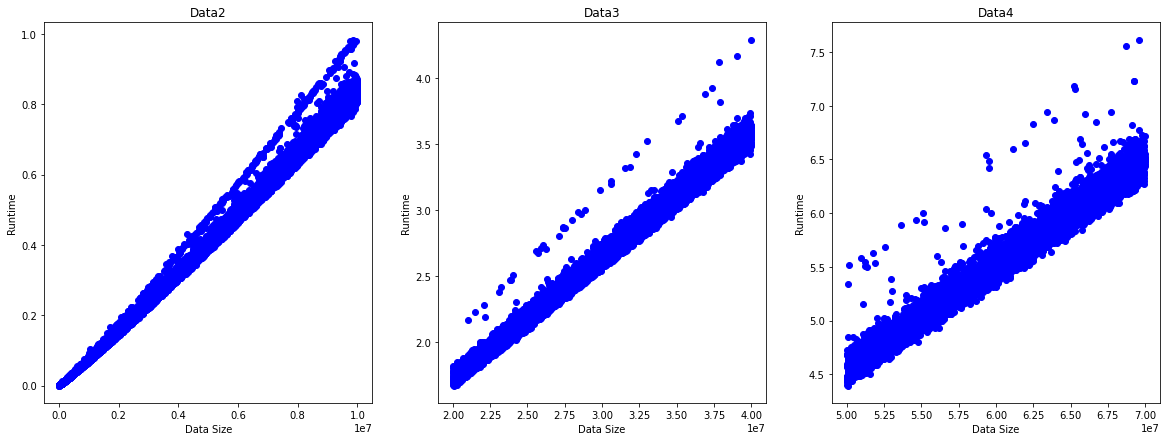

In [13]:
plt.figure(figsize=(20, 7))

plt.subplot(1,3,1)
plt.title("Data2")
plt.scatter(data2_X, data2_y, color='blue')
plt.ylabel('Runtime')
plt.xlabel('Data Size')

plt.subplot(1,3,2)
plt.title("Data3")
plt.scatter(data3_X, data3_y, color='blue')
plt.ylabel('Runtime')
plt.xlabel('Data Size')

plt.subplot(1,3,3)
plt.title("Data4")
plt.scatter(data4_X, data4_y, color='blue')
plt.ylabel('Runtime')
plt.xlabel('Data Size')

plt.show()

▶<b>Nhận xét</b>:<br>
Theo <b>scatter plot</b> trên, dữ liệu có hình dạng như một 'cái chày', một <b>linear model</b> có vẻ phù hợp cho bài toán. Tuy nhiên đối với Data3 và đặc biệt là Data4, dữ liệu <b>noise</b> rất nhiều.

In [14]:
X_data2 = np.asanyarray(data2[['Data Size']])
y_data2 = np.asanyarray(data2[['Runtime']])

X_data3 = np.asanyarray(data3[['Data Size']])
y_data3 = np.asanyarray(data3[['Runtime']])

X_data4 = np.asanyarray(data4[['Data Size']])
y_data4 = np.asanyarray(data4[['Runtime']])

In [15]:
print("X in Data2 shape: {}".format(X_data2.shape))
print("y in Data2 shape: {}".format(y_data2.shape))

print('\n')

print("X in Data3 shape: {}".format(X_data3.shape))
print("y in Data3 shape: {}".format(y_data3.shape))

print('\n')

print("X in Data4 shape: {}".format(X_data4.shape))
print("y in Data4 shape: {}".format(y_data4.shape))

X in Data2 shape: (71115, 1)
y in Data2 shape: (71115, 1)


X in Data3 shape: (10590, 1)
y in Data3 shape: (10590, 1)


X in Data4 shape: (6023, 1)
y in Data4 shape: (6023, 1)


# <b><u>Linear Regression with One Variable</u></b>

## **Linear Regression** (linear_model)

### **Model**

In [16]:
# Train Model với Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_data2,y_data2)
print("Linear Regression Model Intercept: {}".format(linear_model.intercept_))
print("Linear Regression Model Coefficents: {}".format(linear_model.coef_))

Linear Regression Model Intercept: [-0.01589553]
Linear Regression Model Coefficents: [[8.45569856e-08]]


### **Evaluate**

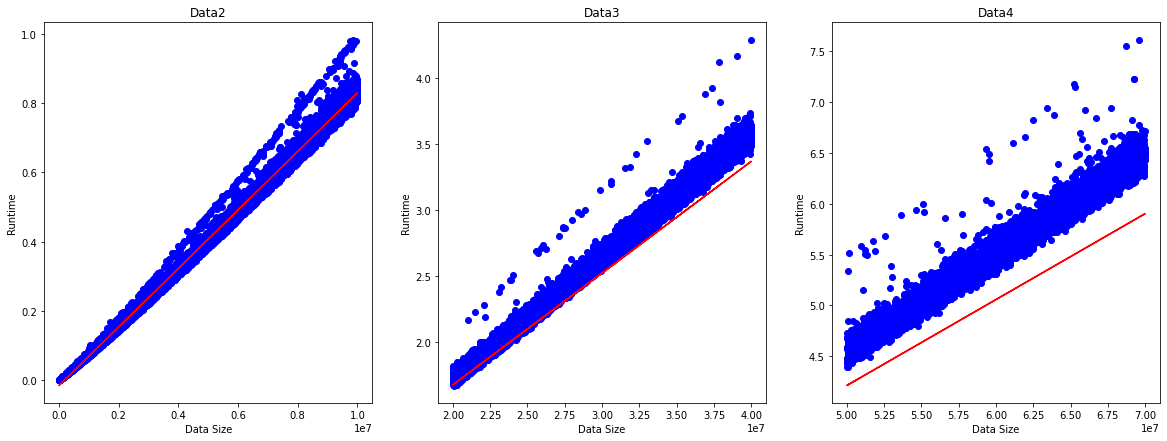

In [17]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.title("Data2")
plt.scatter(data2_X, data2_y,  color='blue')
plt.plot(X_data2, linear_model.coef_[0][0]*X_data2 + linear_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,2)
plt.title("Data3")
plt.scatter(data3_X, data3_y,  color='blue')
plt.plot(X_data3, linear_model.coef_[0][0]*X_data3 + linear_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,3)
plt.title("Data4")
plt.scatter(data4_X, data4_y,  color='blue')
plt.plot(X_data4, linear_model.coef_[0][0]*X_data4 + linear_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.show()

In [18]:
y_data2_linear_pred = linear_model.predict(X_data2)
y_data3_linear_pred = linear_model.predict(X_data3)
y_data4_linear_pred = linear_model.predict(X_data4)

#Data2 evaluate
Evaluation_Metrics(y_data2, y_data2_linear_pred, "Data2")
#Data3 evaluate
Evaluation_Metrics(y_data3, y_data3_linear_pred, "Data3")
#Data4 evaluate
Evaluation_Metrics(y_data4, y_data4_linear_pred, "Data4")

print("\n")

==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.008291970317762349
Mean Squared Error: 0.00014337728721748835
Root Mean Squared Error: 0.011974025522667318
R2-score: 0.9975924993345858
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.12271198006925235
Mean Squared Error: 0.020664949397549082
Root Mean Squared Error: 0.14375308482794058
R2-score: 0.9284132208349453
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.4520113867328918
Mean Squared Error: 0.22348476817426036
Root Mean Squared Error: 0.4727417563260732
R2-score: 0.3156839605365861
----------------------------------------------





▶<b><u>Nhận xét</u></b>: <br>
<li><b>MAE</b>, <b>MSE</b>, <b>RMSE</b> của các predicted label trên <b>Data2 Set</b>(Training Set) nhỏ hơn rất nhiều so với <b>Data3 Set</b> và <b>Data4 Set</b></li>
<li><b>R2-score</b> cho thấy <b>linear_model</b> đưa ra các dự đoán rất tốt đối với các dữ liệu trong Training Set (<b>Data2~0.99</b>). Nhưng lại thực hiện không tốt bằng so với các dữ liệu trong Test Set (<b>Data3~0.92</b>) và thậm chí rất tệ đối với (<b>Data4~0.31</b>)  </li>
<li>Điều đó có nghĩa là <b>linear_model</b> chỉ thực hiện dự đoán tốt đối với các dữ liệu được nhìn thấy trước (<b>Data2</b>), đối với các dữ liệu mới (<b>Data3</b>, <b>Data4</b>) thì Model lại dự đoán không được tốt bằng.</li>
▶▶<b> linear_model bị overfitting</b>.<br>

## **Delete some training samples** (linear_model_del_some_sample)
Nguyên nhân <b>Linear Regression Model</b> bị overfitting có thể là vì dữ liệu trên Training Set (**Data2**) có scale của label **thấp hơn đáng kể** so với Test Set (**Data3**, **Data4**). Điều đó ảnh hưởng không tốt đến performance của Model.<br>
▶<b><u>Giải pháp:</b></u> Loại bỏ các training sample có label quá thấp.<br>
> Dựa trên miền giá trị của Training Label lần lượt đặt các threshold có giá trị <b>0.4</b>; <b>0.5</b>; <b>0.6</b>; <b>0.7</b>; <b>0.8</b>; <b>0.9</b>. Train Model với các sample có giá trị label lớn hơn lần lượt các threshold. Vì miền giá trị của label **Runtime** nằm trong khoảng **[9e-6 , 0.98]** nên đặt threshold có giá trị như trên để loại bỏ bớt các sample có giá trị thấp.




In [19]:
threshold_list = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

======================Threshold: 0.4=======================
X_train shape: (35852, 1)
y_train shape: (35852, 1)
==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.011029848728470905
Mean Squared Error: 0.00021425019283903449
Root Mean Squared Error: 0.014637287755558899
R2-score: 0.9964024463578902
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.07384965940218395
Mean Squared Error: 0.009513783536104197
Root Mean Squared Error: 0.09753862586741828
R2-score: 0.9670426910842569
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.3308178299640628
Mean Squared Error: 0.12694251692576344
Root Mean Squared Error: 0.35628993379797225
R2-score: 0.6112987872425355
----------------------------------------------



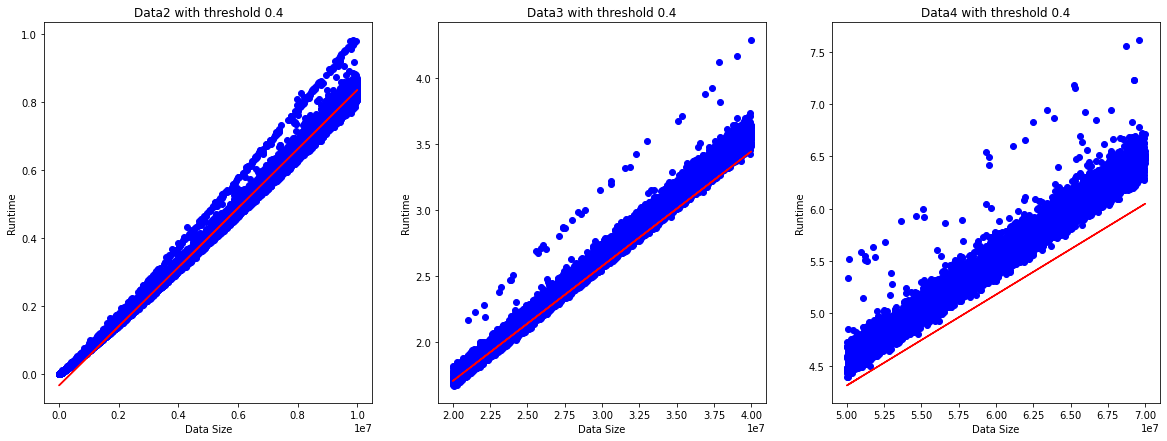




======================Threshold: 0.5=======================
X_train shape: (27405, 1)
y_train shape: (27405, 1)
==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.011128217239027884
Mean Squared Error: 0.00021738068368045335
Root Mean Squared Error: 0.014743835446736828
R2-score: 0.9963498811369264
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.07260743046053066
Mean Squared Error: 0.009275871836406673
Root Mean Squared Error: 0.09631132766402233
R2-score: 0.9678668562916999
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.32737239150818664
Mean Squared Error: 0.12463349204356398
Root Mean Squared Error: 0.35303468957535034
R2-score: 0.618369080109999
----------------------------------------------



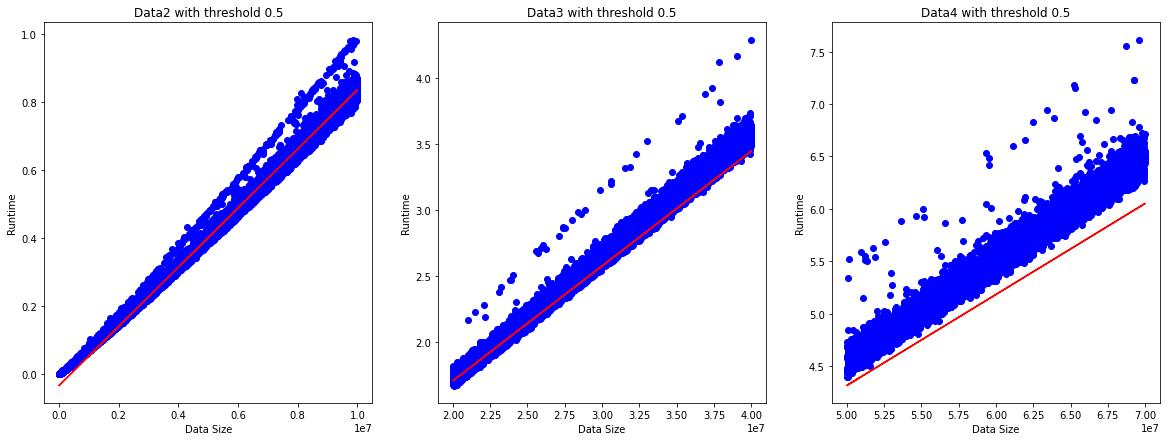




======================Threshold: 0.6=======================
X_train shape: (19088, 1)
y_train shape: (19088, 1)
==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.009302029365561564
Mean Squared Error: 0.00016169562704552006
Root Mean Squared Error: 0.012715959540888767
R2-score: 0.9972849093656225
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.08941105057870871
Mean Squared Error: 0.012679969990312633
Root Mean Squared Error: 0.11260537283057427
R2-score: 0.9560745011249004
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.3745827160316139
Mean Squared Error: 0.15840364250298228
Root Mean Squared Error: 0.3979995508828902
R2-score: 0.51496402121823
----------------------------------------------



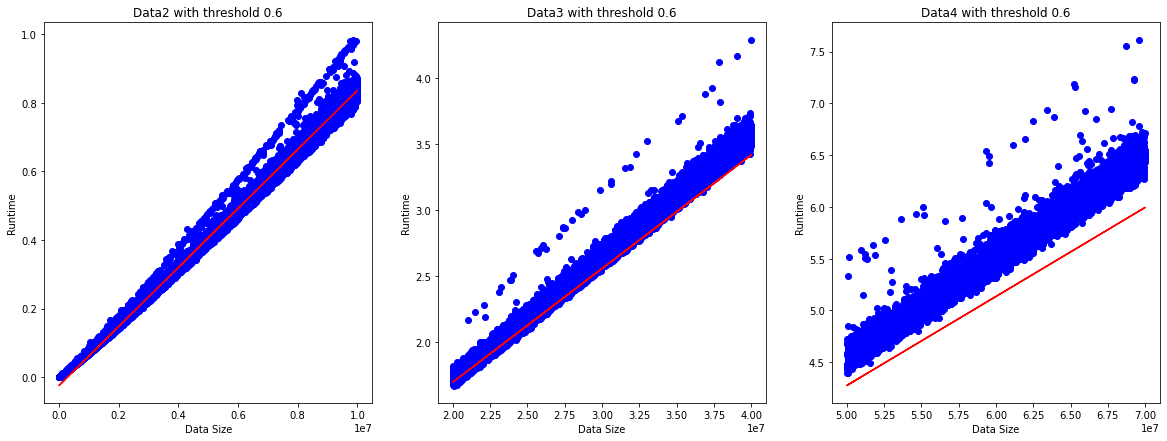




======================Threshold: 0.7=======================
X_train shape: (11052, 1)
y_train shape: (11052, 1)
==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.024756926731401566
Mean Squared Error: 0.0007515725266979092
Root Mean Squared Error: 0.027414823119945697
R2-score: 0.9873800697917549
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.19211214661601386
Mean Squared Error: 0.04497934729986052
Root Mean Squared Error: 0.21208334988834113
R2-score: 0.8441841525861512
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.6317424649349715
Mean Squared Error: 0.42166979607584104
Root Mean Squared Error: 0.649361067570147
R2-score: -0.29116363128142253
----------------------------------------------



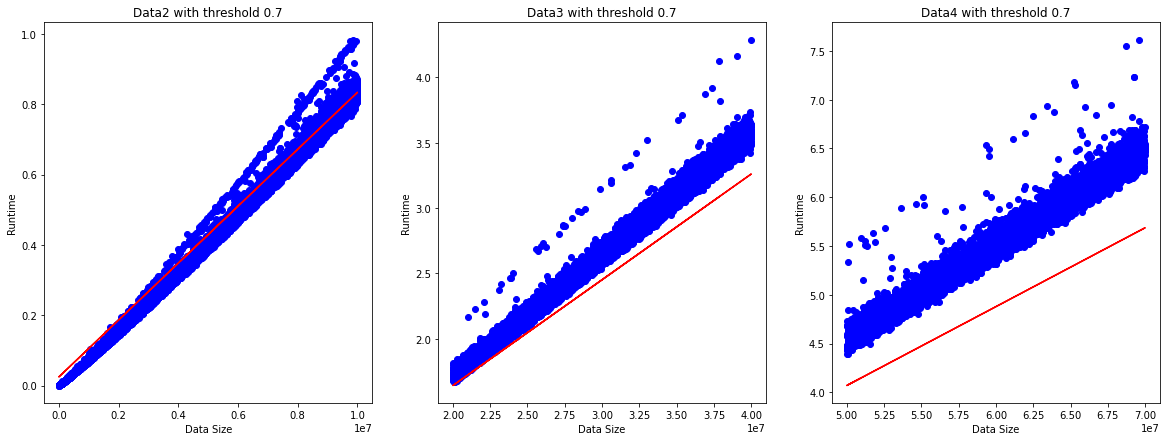




======================Threshold: 0.8=======================
X_train shape: (2902, 1)
y_train shape: (2902, 1)
==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.32140453305347644
Mean Squared Error: 0.13748684893601384
Root Mean Squared Error: 0.37079219103968986
R2-score: -1.308592153770201
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 1.4096589684118384
Mean Squared Error: 2.1649547485788196
Root Mean Squared Error: 1.4713785198169842
R2-score: -6.499758867410038
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 3.67021598388189
Mean Squared Error: 13.679954407932303
Root Mean Squared Error: 3.698642238434572
R2-score: -40.88836803936823
----------------------------------------------



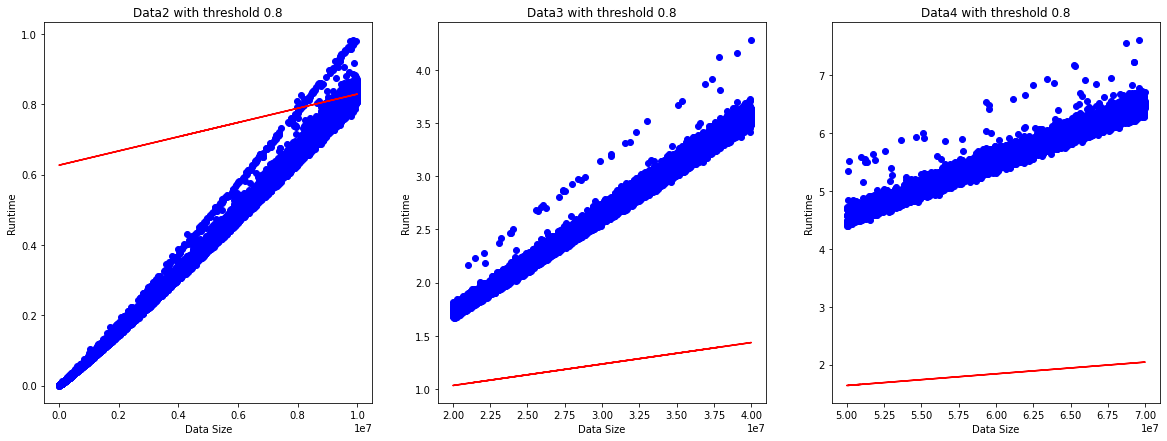




======================Threshold: 0.9=======================
X_train shape: (30, 1)
y_train shape: (30, 1)
==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.12231894643839956
Mean Squared Error: 0.01539078313405173
Root Mean Squared Error: 0.12405959509063268
R2-score: 0.7415677102310589
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.14920560731817775
Mean Squared Error: 0.02504867627485149
Root Mean Squared Error: 0.15826773605145014
R2-score: 0.9132272708551896
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.08616841415445993
Mean Squared Error: 0.015652759331423422
Root Mean Squared Error: 0.12511098805230267
R2-score: 0.9520708531509336
----------------------------------------------



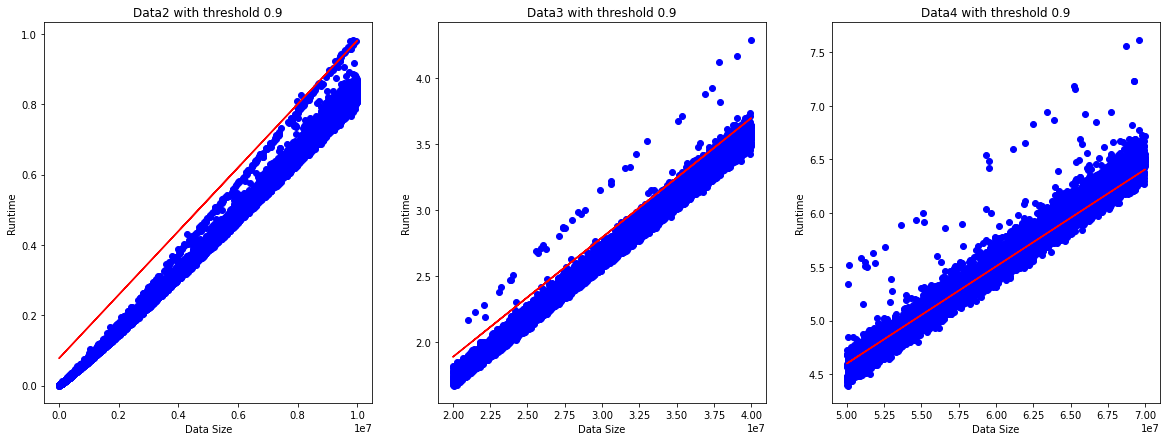

In [20]:
for threshold in threshold_list:
  print("======================Threshold: {}=======================".format(threshold))
  new_data2 = data2[data2["Runtime"] >= threshold]

  new_X_data2 = np.asanyarray(new_data2[['Data Size']])
  new_y_data2 = np.asanyarray(new_data2[['Runtime']])

  print("X_train shape: {}".format(new_X_data2.shape))
  print("y_train shape: {}".format(new_y_data2.shape))

  linear_model_del_some_sample = LinearRegression()
  linear_model_del_some_sample.fit(new_X_data2, new_y_data2)

  new_y_data2_linear_del_some_sample_pred = linear_model_del_some_sample.predict(X_data2)
  new_y_data3_linear_del_some_sample_pred = linear_model_del_some_sample.predict(X_data3)
  new_y_data4_linear_del_some_sample_pred = linear_model_del_some_sample.predict(X_data4)

  #Data2 evaluate
  Evaluation_Metrics(y_data2, new_y_data2_linear_del_some_sample_pred, "Data2")
  #Data3 evaluate
  Evaluation_Metrics(y_data3, new_y_data3_linear_del_some_sample_pred, "Data3")
  #Data4 evaluate
  Evaluation_Metrics(y_data4, new_y_data4_linear_del_some_sample_pred, "Data4")

  plt.figure(figsize=(20,7))
  plt.subplot(1,3,1)
  plt.title("Data2 with threshold {}".format(threshold))
  plt.scatter(data2_X, data2_y,  color='blue')
  plt.plot(X_data2, linear_model_del_some_sample.coef_[0][0]*X_data2 + linear_model_del_some_sample.intercept_[0], '-r')
  plt.xlabel("Data Size")
  plt.ylabel("Runtime")

  plt.subplot(1,3,2)
  plt.title("Data3 with threshold {}".format(threshold))
  plt.scatter(data3_X, data3_y,  color='blue')
  plt.plot(X_data3, linear_model_del_some_sample.coef_[0][0]*X_data3 + linear_model_del_some_sample.intercept_[0], '-r')
  plt.xlabel("Data Size")
  plt.ylabel("Runtime")

  plt.subplot(1,3,3)
  plt.title("Data4 with threshold {}".format(threshold))
  plt.scatter(data4_X, data4_y,  color='blue')
  plt.plot(X_data4, linear_model_del_some_sample.coef_[0][0]*X_data4 + linear_model_del_some_sample.intercept_[0], '-r')
  plt.xlabel("Data Size")
  plt.ylabel("Runtime")

  plt.show()
  print("\n\n")


▶<b><u>Nhận xét</u></b>: <br>
<li>Việc loại bỏ các samples có giá trị bé hơn threshold ảnh hưởng đến performance của Linear Regression Model (<b>linear_model_del_some_sample</b>).</li>
<li>Đối với Model <b>linear_model_del_some_sample</b> được train với sample có feature lớn hơn threshold <b>0.4</b>, performance được cải thiện tốt hơn, điều đó được thể hiện thông qua R2-score đạt <b>Data2~0.99</b>, <b>Data3~0.96</b> và <b>Data4~0.61</b>. Điều đó cho thấy <b>linear_model_del_some_sample được train với label sample lớn hơn 0.4 </b> thực hiện dự đoán tốt đối với các sample có scale thấp (Data2, Data3) nhưng lại không tốt lắm đối với các sample có scale cao (Data4).</li>
<li>Với Model <b>linear_model_del_some_sample</b> được train với sample có feature lơn hơn threshold <b>0.9</b>, tuy Model không thể hiện tốt đối với Training Set(<b>R2-score Data2~0.74</b>) nhưng lại thể hiện tốt đối với Data3 và Data4 khi <b>R2-score</b> lần lượt đạt <b>~0.91</b> và <b>~0.95</b>. Điều đó cho thấy Model được cải thiện thông qua việc dự đoán tốt đối với các feature có scale lớn hơn, tức là dự đoán tốt đối với các sample chưa được nhìn thấy trước. Model đã không còn overfiting. Nhưng lại thực hiện dự đoán không tốt đối với các sample có scale thấp (Data2).</li>
<li>So với Model <b>linear_model</b>, tuy performance của <b>linear_model_del_some_sample</b> tốt hơn thông qua việc train model với các sample có giá trị lơn hơn threshold, nhưng vẫn chưa thực sự đủ tốt(general) để có thể dự đoán tốt mọi trường hợp.</li>

# **<u>Linear Regression  with Multiple Variable </u>**
Train Linear Regression Model với multiple variable để đánh giá performance của Model có được cải thiện hay không.

## **Polynomial** (poly_model)
Thay vì Linear Model, thử nghiệm với Quadratic Model có giúp cải thiện performance hay không.

### **Data**

In [21]:
poly_quadratic = PolynomialFeatures(degree = 2)
X_poly_quadratic_data2 = poly_quadratic.fit_transform(X_data2)
X_poly_quadratic_data3 = poly_quadratic.fit_transform(X_data3)
X_poly_quadratic_data4 = poly_quadratic.fit_transform(X_data4)

print("X_data2 shape: {}".format(X_poly_quadratic_data2.shape))
print("X_data3 shape: {}".format(X_poly_quadratic_data3.shape))
print("X_data4 shape: {}".format(X_poly_quadratic_data4.shape))

X_data2 shape: (71115, 3)
X_data3 shape: (10590, 3)
X_data4 shape: (6023, 3)


### **Model**

In [22]:
# Train Model với Hàm bậc 2
poly_model = LinearRegression()
poly_model.fit(X_poly_quadratic_data2, y_data2)
print("Coefficents: {}".format(poly_model.coef_))
print("Intercept: {}".format(poly_model.intercept_))

Coefficents: [[0.00000000e+00 7.85415401e-08 6.02207246e-16]]
Intercept: [-0.00587744]


### **Evaluate**

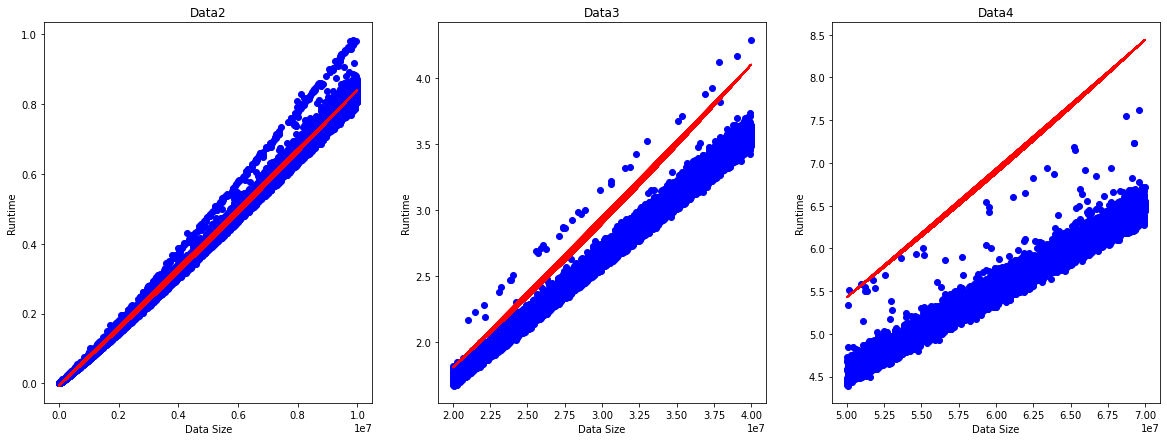

In [23]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.title("Data2")
plt.scatter(data2_X, data2_y,  color='blue')
plt.plot(X_data2,  poly_model.coef_[0][1]*X_data2 + poly_model.coef_[0][2]*np.power(X_data2,2) + poly_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,2)
plt.title("Data3")
plt.scatter(data3_X, data3_y,  color='blue')
plt.plot(X_data3, poly_model.coef_[0][1]*X_data3 + poly_model.coef_[0][2]*np.power(X_data3,2) + poly_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,3)
plt.title("Data4")
plt.scatter(data4_X, data4_y,  color='blue')
plt.plot(X_data4,  poly_model.coef_[0][1]*X_data4 + poly_model.coef_[0][2]*np.power(X_data4,2) + poly_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.show()

In [24]:
y_data2_poly_pred = poly_model.predict(X_poly_quadratic_data2)
y_data3_poly_pred = poly_model.predict(X_poly_quadratic_data3)
y_data4_poly_pred = poly_model.predict(X_poly_quadratic_data4)

#Data2 evaluate
Evaluation_Metrics(y_data2, y_data2_poly_pred, "Data2")
#Data3 evaluate
Evaluation_Metrics(y_data3, y_data3_poly_pred, "Data3")
#Data4 evaluate
Evaluation_Metrics(y_data4, y_data4_poly_pred, "Data4")

print("\n")

==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.007073665718015936
Mean Squared Error: 0.00012327598540427578
Root Mean Squared Error: 0.011102971917656811
R2-score: 0.9979300276727918
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.2703565635200137
Mean Squared Error: 0.09177695238564393
Root Mean Squared Error: 0.30294711153210213
R2-score: 0.6820695615324346
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 1.3859805816162731
Mean Squared Error: 2.034187428861318
Root Mean Squared Error: 1.426249427295702
R2-score: -5.228733601026541
----------------------------------------------





▶<b><u>Nhận xét</u></b>:<br>
Dựa vào kết quả R2-score, MAE, MSE, RMSE có thể thấy <b>poly_model</b> cho kết quả rất xấu và overfitting nặng hơn trước rất nhiều (R2-score đạt **~0.99 trên Train Set(Data2)** nhưng lại được lần lượt **~0.68, ~-5.2 trên Data3 và Data4**. <br>
▶▶ <b>Polynomial Regression không phù hợp với bài toán.</b>

## **Gợi ý của Thầy An** (multi_val_model)
Bài toán dự đoán thời gian chạy có input là kích thước dữ liệu. Độ phức tạp thuật toán có thể hiểu là nó tỉ lệ thuận (1 cách tương đối) với thời gian chạy.<br>
▶ Xây dựng Model có hypothesis dựa trên độ phức tạp thuật toán: <br>
> y = 𝞱_1*sqrt(x) + 𝞱_2*log(x)+𝞱_3 * x + 𝞱_4 *x *log(x) + 𝞱_5 * x^2 + 𝞱_6 * x^3 + 𝞱_0

### **Data**

In [25]:
sqrt_X_data2 = np.sqrt(X_data2)
sqrt_X_data3 = np.sqrt(X_data3)
sqrt_X_data4 = np.sqrt(X_data4)

log_X_data2 = np.log(X_data2)
log_X_data3 = np.log(X_data3)
log_X_data4 = np.log(X_data4)

X_quad_data2 = np.power(X_data2, 2)
X_quad_data3 = np.power(X_data3, 2)
X_quad_data4 = np.power(X_data4, 2)

X_cubic_data2 = np.power(X_data2,3)
X_cubic_data3 = np.power(X_data3,3)
X_cubic_data4 = np.power(X_data4,3)

one_data2 = np.ones((X_data2.shape[0], 1))
one_data3 = np.ones((X_data3.shape[0], 1))
one_data4 = np.ones((X_data4.shape[0], 1))

In [26]:
new_X_data2 = np.concatenate((one_data2, sqrt_X_data2, log_X_data2, X_data2, X_data2 * log_X_data2, X_quad_data2, X_cubic_data2), axis = 1)
new_X_data3 = np.concatenate((one_data3, sqrt_X_data3, log_X_data3, X_data3, X_data3 * log_X_data3, X_quad_data3, X_cubic_data3), axis = 1)
new_X_data4 = np.concatenate((one_data4, sqrt_X_data4, log_X_data4, X_data4, X_data4 * log_X_data4, X_quad_data4, X_cubic_data4), axis = 1)

In [27]:
print("New X_data2 shape: {}".format(new_X_data2.shape))
print("New X_data3 shape: {}".format(new_X_data3.shape))
print("New X_data4 shape: {}".format(new_X_data4.shape))

New X_data2 shape: (71115, 7)
New X_data3 shape: (10590, 7)
New X_data4 shape: (6023, 7)


### **Model**

In [28]:
multi_val_model = LinearRegression()
multi_val_model.fit(new_X_data2, y_data2)
print("Coefficents: {}".format(multi_val_model.coef_))
print("Intercept: {}".format(multi_val_model.intercept_))

Coefficents: [[ 0.00000000e+00  2.38580182e-11  1.00246977e-13  5.62062028e-09
   4.85026693e-09 -4.44652097e-18 -1.35967813e-23]]
Intercept: [0.00018728]


### **Evaluate**

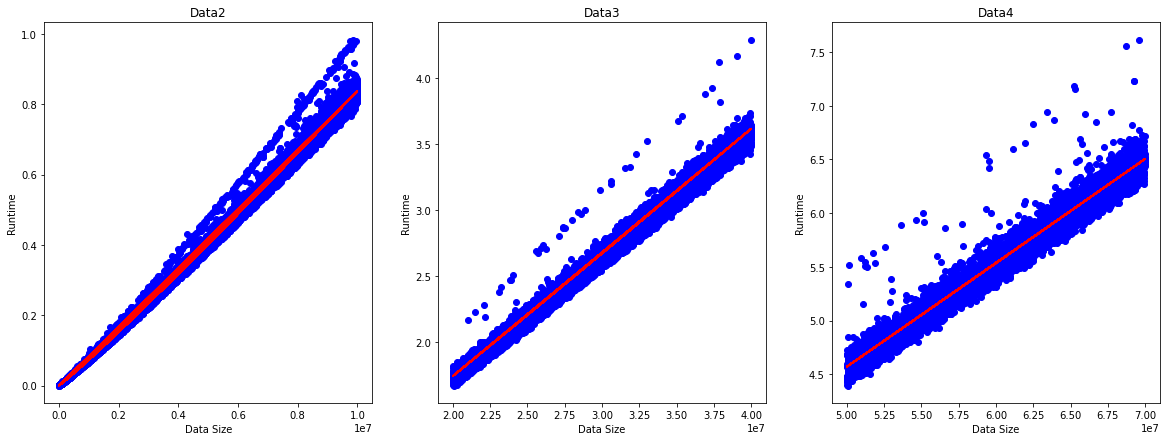

In [29]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.title("Data2")
plt.scatter(data2_X, data2_y,  color='blue')
plt.plot(X_data2, multi_val_model.coef_[0][1]*np.sqrt(X_data2) +
                  multi_val_model.coef_[0][2]*np.log(X_data2) + 
                  multi_val_model.coef_[0][3]*X_data2 + 
                  multi_val_model.coef_[0][4]* X_data2 * np.log(X_data2) + 
                  multi_val_model.coef_[0][5]*np.power(X_data2,2) +
                  multi_val_model.coef_[0][6]*np.power(X_data2,3) +
                  multi_val_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,2)
plt.title("Data3")
plt.scatter(data3_X, data3_y,  color='blue')
plt.plot(X_data3, multi_val_model.coef_[0][1]*np.sqrt(X_data3) +
                  multi_val_model.coef_[0][2]*np.log(X_data3) + 
                  multi_val_model.coef_[0][3]*X_data3 + 
                  multi_val_model.coef_[0][4]* X_data3 * np.log(X_data3) + 
                  multi_val_model.coef_[0][5]*np.power(X_data3,2) +
                  multi_val_model.coef_[0][6]*np.power(X_data3,3) +
                  multi_val_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,3)
plt.title("Data4")
plt.scatter(data4_X, data4_y,  color='blue')
plt.plot(X_data4, multi_val_model.coef_[0][1]*np.sqrt(X_data4) +
                  multi_val_model.coef_[0][2]*np.log(X_data4) + 
                  multi_val_model.coef_[0][3]*X_data4 + 
                  multi_val_model.coef_[0][4]* X_data4 * np.log(X_data4) + 
                  multi_val_model.coef_[0][5]*np.power(X_data4,2) +
                  multi_val_model.coef_[0][6]*np.power(X_data4,3) +
                  multi_val_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.show()

In [30]:
y_data2_multi_pred = multi_val_model.predict(new_X_data2)
y_data3_multi_pred = multi_val_model.predict(new_X_data3)
y_data4_multi_pred = multi_val_model.predict(new_X_data4)

#Data2 evaluate
Evaluation_Metrics(y_data2, y_data2_multi_pred, "Data2")
#Data3 evaluate
Evaluation_Metrics(y_data3, y_data3_multi_pred, "Data3")
#Data4 evaluate
Evaluation_Metrics(y_data4, y_data4_multi_pred, "Data4")

print("\n")

==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.006871473074348903
Mean Squared Error: 0.00012189765354938603
Root Mean Squared Error: 0.011040727038985523
R2-score: 0.9979531717489716
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.05064786117398697
Mean Squared Error: 0.004274709679988428
Root Mean Squared Error: 0.06538126398279884
R2-score: 0.9851917034990492
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.08833723190556117
Mean Squared Error: 0.014989327339488103
Root Mean Squared Error: 0.12243090843201361
R2-score: 0.9541022987697263
----------------------------------------------





▶<b><u>Nhận xét</u></b>:<br>
So với các giải pháp trên thì performance của <b>multi_val_model</b> được cải thiện đáng kể. R2-score đối với **Data2** (Train Set) vẫn 0.99 và đối với **Data2, Data3**(Test Set) đã được cải thiện đáng kể lần lượt là **~98** và **~95**. Tuy còn overfiting một chút nhưng không đáng kể. Đây là kết quả có thể chấp nhận được, cho thấy <b>multi_val_model</b> có thể đưa ra các dự đoán tốt được các trường hợp sample có scale lớn và nhỏ.

# **<u>Model của Nhóm</u>** (muti_val_model_2)
Dựa vào gợi ý của thầy, nhóm chúng em tiến hành thực nghiệm  với nhiều hypothesis khác nhau và cho ra kết quả tương đối tốt đối với hypothesis sau:
> y = 𝚹_0 + 𝚹_1 * log2(x) + 𝚹_2 * X^2 + 𝚹_3 * x * log2(x)

## **Data**

In [31]:
log_2_X_data2 = np.log2(X_data2) 
log_2_X_data3 = np.log2(X_data3)
log_2_X_data4 = np.log2(X_data4)

In [32]:
new_X_data2_2 = np.concatenate((one_data2, log_2_X_data2, X_quad_data2, X_data2 * log_2_X_data2), axis = 1)
new_X_data3_2 = np.concatenate((one_data3, log_2_X_data3, X_quad_data3, X_data3 * log_2_X_data3), axis = 1)
new_X_data4_2 = np.concatenate((one_data4, log_2_X_data4, X_quad_data4, X_data4 * log_2_X_data4), axis = 1)

In [33]:
print("New X_data2 shape: {}".format(new_X_data2_2.shape))
print("New X_data3 shape: {}".format(new_X_data3_2.shape))
print("New X_data4 shape: {}".format(new_X_data4_2.shape))

New X_data2 shape: (71115, 4)
New X_data3 shape: (10590, 4)
New X_data4 shape: (6023, 4)


## **Model**

In [34]:
multi_val_model_2 = LinearRegression()
multi_val_model_2.fit(new_X_data2_2, y_data2)
print("Coefficents: {}".format(multi_val_model_2.coef_))
print("Intercept: {}".format(multi_val_model_2.intercept_))

Coefficents: [[ 0.00000000e+00  1.55061620e-04 -3.88686479e-17  3.61305901e-09]]
Intercept: [-0.00223771]


## **Evaluate**

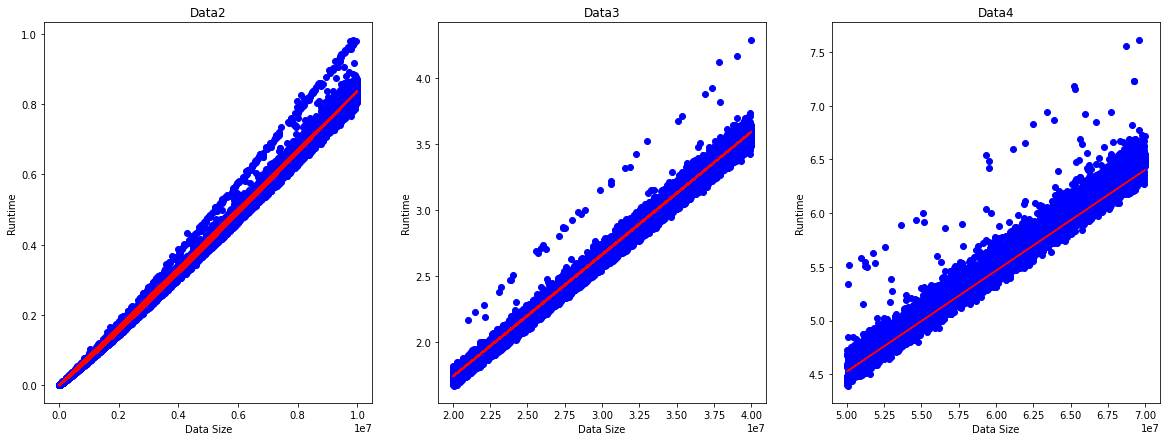

In [35]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.title("Data2")
plt.scatter(data2_X, data2_y,  color='blue')
plt.plot(X_data2, multi_val_model_2.coef_[0][1]*np.log2(X_data2) +
                  multi_val_model_2.coef_[0][2]*np.power(X_data2,2) + 
                  multi_val_model_2.coef_[0][3]* X_data2 * np.log2(X_data2) +
                  multi_val_model_2.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,2)
plt.title("Data3")
plt.scatter(data3_X, data3_y,  color='blue')
plt.plot(X_data3, multi_val_model_2.coef_[0][1]*np.log2(X_data3) +
                  multi_val_model_2.coef_[0][2]*np.power(X_data3,2) + 
                  multi_val_model_2.coef_[0][3]* X_data3 * np.log2(X_data3) +
                  multi_val_model_2.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,3)
plt.title("Data4")
plt.scatter(data4_X, data4_y,  color='blue')
plt.plot(X_data4, multi_val_model_2.coef_[0][1]*np.log2(X_data4) +
                  multi_val_model_2.coef_[0][2]*np.power(X_data4,2) + 
                  multi_val_model_2.coef_[0][3]* X_data4 * np.log2(X_data4) +
                  multi_val_model_2.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.show()

In [36]:
y_data2_multi_pred_2 = multi_val_model_2.predict(new_X_data2_2)
y_data3_multi_pred_2 = multi_val_model_2.predict(new_X_data3_2)
y_data4_multi_pred_2 = multi_val_model_2.predict(new_X_data4_2)

#Data2 evaluate
Evaluation_Metrics(y_data2, y_data2_multi_pred_2, "Data2")
#Data3 evaluate
Evaluation_Metrics(y_data3, y_data3_multi_pred_2, "Data3")
#Data4 evaluate
Evaluation_Metrics(y_data4, y_data4_multi_pred_2, "Data4")

print("\n")

==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.006871252501228357
Mean Squared Error: 0.00012190378599944674
Root Mean Squared Error: 0.011041004754977997
R2-score: 0.9979530687767513
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.04635963497066036
Mean Squared Error: 0.0036969302324655787
Root Mean Squared Error: 0.06080238673329838
R2-score: 0.9871932264120852
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.0840980752893261
Mean Squared Error: 0.01671394923181881
Root Mean Squared Error: 0.1292824397658816
R2-score: 0.9488214627084006
----------------------------------------------





▶<b><u>Nhận xét:</u></b>
<br>
* **multi_val_model_2** ít variable hơn so với **multi_val_model** nhưng performance cũng không quá tệ. 
* R2-score của **multi_val_model_2** tăng lên **~0.002** so với **multi_val_model** trên Data3. 
* Nhưng lại thấp hơn ở Data4 khi **muli_val_model** đạt R2-score **~0.95** trong khi **muli_val_model2** đạt **~0.94**.


